In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': '한글'}>

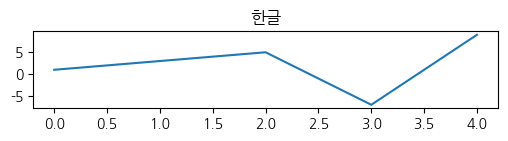

In [3]:
import koreanize_matplotlib

%config lnlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title = "한글", figsize=(6,1))

### 분석 순서
- 분석하고자 하는 데이터를 corpus에 담는다.
- sklearn.feature_extraction.text 에서 CountVectorizer() 를 불러온다.
- fit() 에 데이터(corpus)를 넣어 단어 사전을 학습시킨다.
- transform() 메서드를 통해 수치 행렬 형태로 변환한다.


In [4]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '택시 승강장 문의입니다.']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# sklearn.feature_extraction.text 에서 CountVectorizer() 를 통해 BOW를 생성한다.

- 다음으로 문장에서 노출되는 feature(특징이 될만한 단어) 수를 합한 Document Term Matrix(이하 dtm) 을 반환하고
- fit() 에 데이터(corpus)를 넣어 단어 사전을 학습시킨다.
- fit()은 모든 토큰의 어휘 사전을 학습한다.
- 마지막으로 transform(): 문서를 단어 빈도수가 들어있는 문서 용어 매트릭스로 변환한다.


In [6]:
cvect = CountVectorizer()
cvect.fit(corpus)
dtm = cvect.transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [7]:
dtm = cvect.fit_transform(corpus)
dtm
# 또 다른 방법으로는 fit_transform()을 사용하여 효율적으로 구현할 수도 있다.

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

### fit, transform, fit_transfrom의 차이점
- fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 학습.
- transform(): 문서를 문서 용어 매트릭스로 변환. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경.
- fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환. fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현된다.


### 주의사항
- 단, fit_transform 은 학습데이터에만 사용하고 예측 데이터에는 transform 을 사용한다.
- 예측 데이터에도 fit_transform 을 사용하게 된다면 서로 다른 단어사전으로 행렬을 만들게 된다.
- fit 과 transform 을 따로 사용해 준다 하더라도 fit 은 학습 데이터에만 사용한다. 같은 단어 사전으로 예측 데이터셋의 단어 사전을 만들기 위해서이다.


In [8]:
cvect.vocabulary_

{'코로나': 7,
 '거리두기와': 0,
 '상생지원금': 2,
 '문의입니다': 1,
 '지하철': 6,
 '운행시간과': 5,
 '요금': 4,
 '승강장': 3,
 '택시': 8}

In [9]:
vocab = cvect.get_feature_names_out()
vocab
# get_feature_names_out()을 사용하면 dtm 이라는 변수로 쓰여진 단어-문서 행렬에 등장하는 순서대로 단어 사전을 반환한다.

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

- document-term matrix를 판다스의 데이터프레임으로 만들어서 단어의 빈도를 확인할 수 있다.
- 전체 문서에는 등장하지만, 해당 문서에는 등장하지 않는 단어는 0으로 표시된다. 예시 문서의 빈도수를 보면 첫 번째 문서에서 “코로나"라는 단어가 2번 등장하기 때문에 빈도수가 2로 표시가 되어 있다.


In [ ]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm


,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


In [11]:
df_dtm.sum().to_frame().T
# 전체 문서에서 단어 빈도의 합계를 구하는 것으로 데이터를 간명하게 보이도록 요약한다.
# T는 테이블을 가로로 길게 보여준다.


,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,4,1,2,1,1,3,2,1


단어가방모형.ipynb 에 이어서 진행됩니다.

### N-grams 실습
- 토큰을 몇 개 사용할 것인지를 구분합니다. 지정한 n개의 숫자 만큼의 토큰을 묶어서 사용한다.
- 예를 들어 (1, 1) 이라면 1개의 토큰을 (2, 3)이라면 2~3개의 토큰을 사용한다.
- analyzer 설정에 따라 단어단위, 캐릭터 단위에 따라 사용할 수 있다.
- 기본값 = (1, 1)
- ngram_range(min_n, max_n)
- min_n <= n <= max_n : (1, 1) 은 1 <= n <= 1, (1, 2) 은 1 <= n <= 2, (2, 2) 은 2 <= n <= 2

...
- ngram_range: 추출할 다른 단어 n-gram 또는 char n-gram에 대한 n-값 범위의 하한 및 상한이다.
- 기본값 = (1, 1)
- ngram_range=(1, 2)
- 단어가 너무 많아서 출력이 오래 걸린다면 max_columns 값을 조정해서 사용한다.
- pd.options.display.max_columns = None
